#### ЗАГРУЖАЕМ НЕОБХОДИМЫЕ БИБЛИОТЕКИ

In [1]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#### ЗАГРУЗКА ДАННЫХ

In [2]:
train = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [3]:
test = pd.read_csv("./test.csv", encoding = 'ISO-8859-1', low_memory = False)

In [4]:
sample_submission = pd.read_csv("./sample_submission.csv", encoding = 'ISO-8859-1', low_memory = False)

In [5]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [6]:
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [7]:
sample_submission.head(10)

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0
5,99881,0
6,26630,0
7,79934,0
8,16605,0
9,105449,0


**ПОСМОТРИМ УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ПО СТОЛБЦАМ**

In [8]:
data = pd.concat([train,test], ignore_index=True)

# unique values count, first 10 unique values, null values count, type
data.agg({'nunique', lambda s: s.unique()[:10]})    .append(pd.Series(data.isnull().sum(), name='null'))    .append(pd.Series(data.dtypes, name='dtype'))    .transpose()

,<lambda>,nunique,null,dtype
client_id,"[25905, 63161, 25887, 16222, 101655, 41415, 28...",110148,0,int64
app_date,"[01FEB2014, 12MAR2014, 23JAN2014, 18APR2014, 1...",120,0,object
education,"[SCH, GRD, UGR, PGR, ACD, nan]",5,478,object
sex,"[M, F]",2,0,object
age,"[62, 59, 25, 53, 48, 27, 39, 50, 54, 29]",52,0,int64
car,"[Y, N]",2,0,object
car_type,"[Y, N]",2,0,object
decline_app_cnt,"[0, 2, 1, 3, 4, 6, 5, 7, 8, 9]",24,0,int64
good_work,"[0, 1]",2,0,int64
score_bki,"[-2.00875292, -1.53227621, -1.40814226, -2.057...",102618,0,float64


### КРАТКО О ПРИЗНАКАХ

    client_id ---------------- идентификатор клиента
    education ---------------- уровень образования
    sex ---------------------- пол заемщика
    age ---------------------- возраст заемщика
    car ---------------------- флаг наличия автомобиля
    car_type ----------------- флаг автомобиля иномарки
    decline_app_cnt ---------- количество отказанных прошлых заявок
    good_work ---------------- флаг наличия “хорошей” работы
    bki_request_cnt ---------- количество запросов в БКИ
    home_address ------------- категоризатор домашнего адреса
    work_address ------------- категоризатор рабочего адреса
    income ------------------- доход заемщика
    foreign_passport --------- наличие загранпаспорта
    sna ---------------------- связь заемщика с клиентами банка
    first_time --------------- давность наличия информации о заемщике
    score_bki ---------------- скоринговый балл по данным из БКИ
    region_rating ------------ рейтинг региона
    app_date ----------------- дата подачи заявки
    default ------------------ флаг дефолта по кредиту

## ПРЕДОБРАБОТКА ДАННЫХ

**КОЛИЧЕСТВО ПРОПУСКОВ В ОБУЧАЮЩЕЙ БАЗЕ (TRAIN)**

In [9]:
train.isna().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

**КОЛИЧЕСТВО ПРОПУСКОВ В ТЕСТОВОЙ БАЗЕ (TEST)**

In [10]:
test.isna().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

**ГРАФИЧЕСКОЕ ОТОБРАЖЕНИЕ НАХОЖДЕНИЯ ПРОПУСКОВ В ОБУЧАЮЩЕЙ БАЗЕ**

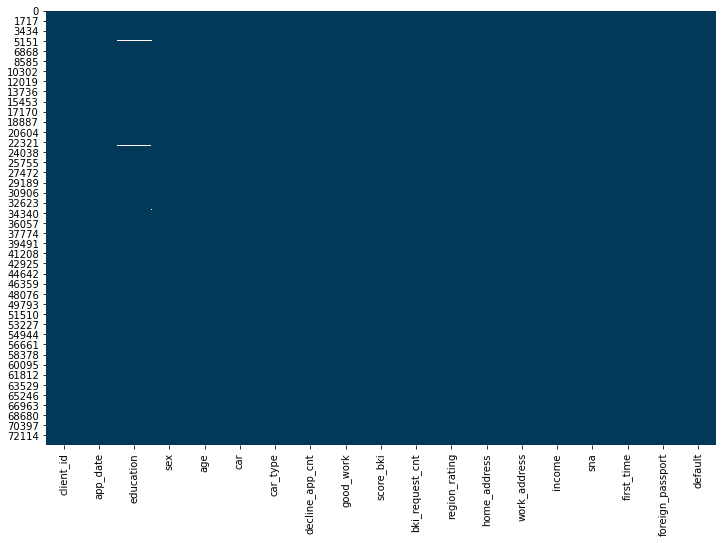

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
sns_heatmap = sns.heatmap(train.isna(),cbar=False, cmap ='PuBu_r')

**ГРАФИЧЕСКОЕ ОТОБРАЖЕНИЕ НАХОЖДЕНИЯ ПРОПУСКОВ В ТЕСТОВОЙ БАЗЕ**

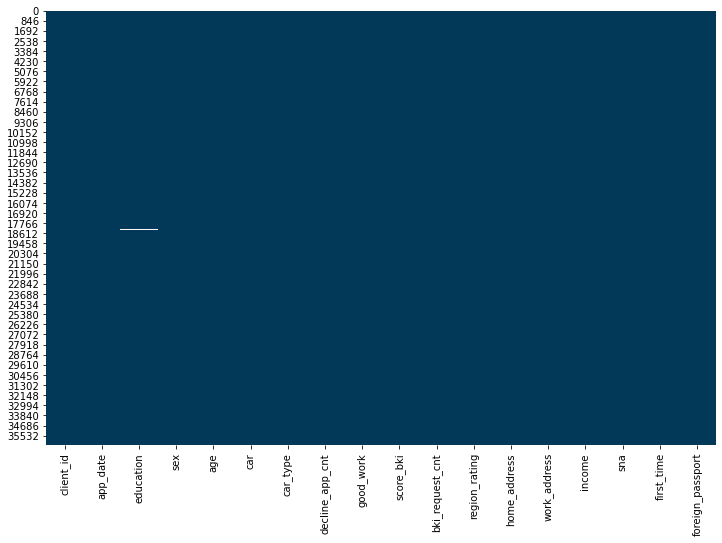

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns_heatmap = sns.heatmap(test.isna(),cbar=False, cmap ='PuBu_r')

**ГИСТОГРАММА ЗНАЧЕНИЙ ПРИЗНАКА EDUCATION, СОДЕРЖАЩЕГО ПРОПУСКИ В ОБУЧАЮЩЕЙ БАЗЕ**

<AxesSubplot:>

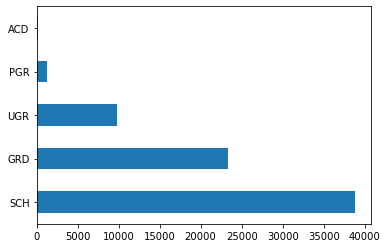

In [13]:
train.education.value_counts().plot.barh()

**ГИСТОГРАММА ЗНАЧЕНИЙ ПРИЗНАКА EDUCATION, СОДЕРЖАЩЕГО ПРОПУСКИ В ТЕСТОВОЙ БАЗЕ**

<AxesSubplot:>

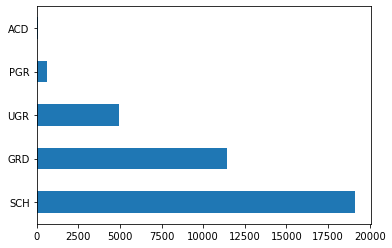

In [14]:
test.education.value_counts().plot.barh()

### ИЗБАВЛЕНИЕ ОТ ПРОПУСКОВ

**ЗАПОЛНИМ ПРОПУСКИ НА НАИБОЛЕЕ ЧАСТО ВСТРЕЧАЮЩЕЕСЯ ЗНАЧЕНИЕ SCH В ОБУЧАЮЩЕЙ И ТЕСТОВОЙ БАЗАХ**

In [15]:
train.education.fillna('SCH', inplace = True)

In [16]:
test.education.fillna('SCH', inplace = True)

**ПОСМОТРИМ НА ЦЕЛЕВУЮ ПЕРЕМЕННУЮ В ОБУЧАЮЩЕЙ БАЗЕ**

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

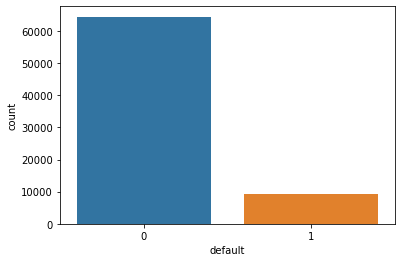

In [17]:
sns.countplot(train['default'])

**РАСПРЕДЕЛЕНИЕ ЗАЁМЩИКОВ НЕРАВНОМЕРНОЕ, НЕДЕФОЛТНЫХ КЛИЕНТОВ ЗАМЕТНО БОЛЬШЕ**

**УСТРАНИМ ДИСБАЛАНС С ПОМОЩЬЮ ДУБЛИРОВАНИЯ ПРИМЕРОВ МИНОРИТАРНОГО КЛАССА**

In [18]:
train_0 = train.query('default == 0')
train_1 = train.query('default == 1')
koeff = int(len(train_0)/len(train_1))
for i in range(koeff):
    train = train.append(train_1).reset_index(drop=True)  # объединяем

**ПОСМОТРИМ НА ЦЕЛЕВУЮ ПЕРЕМЕННУЮ В ОБУЧАЮЩЕЙ БАЗЕ ПОСЛЕ**

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

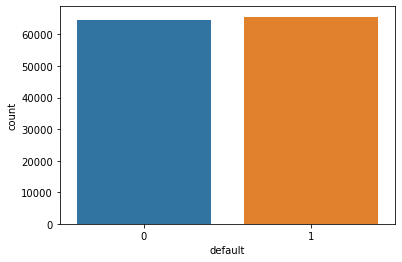

In [19]:
sns.countplot(train['default'])

**ВЫВЕДЕМ НАИМЕНОВАНИЯ ВСЕХ ПРИЗНАКОВ ОБУЧАЮЩЕЙ БАЗЫ**

In [20]:
train.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

**ГРУППИРУЕМ ПРИЗНАКИ**

    target ------ЦЕЛЕВАЯ ПЕРЕМЕННАЯ
    num_cols --- ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ
    bin_cols --- БИНАРНЫЕ ПЕРЕМЕННЫЕ
    cat_cols --- КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ

In [21]:
target = 'default'

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'work_address', 'home_address', 'sna', 'first_time']

## ЧИСЛОВЫЕ ПРИЗНАКИ

**РАСПРЕДЕЛЕНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ В ОБУЧАЮЩЕЙ БАЗЕ**

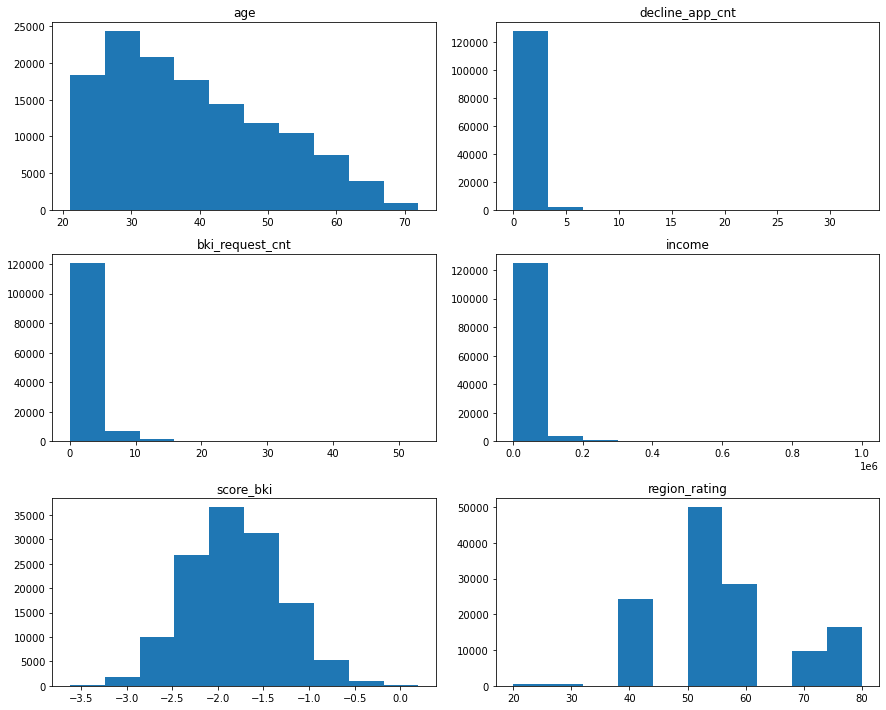

In [22]:
def plot_grid(nplots, max_cols=2, figsize=(1000/82, 800/82)):
    ncols = min(nplots, max_cols)
    nrows = (nplots // ncols) + min(1, (nplots % ncols))
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize, constrained_layout=True)
    if nrows == 1:
        return axs
    return [axs[index // ncols, index % ncols] for index in range(nplots)]

for column, ax in zip(num_cols, plot_grid(len(num_cols))):
    train[column].plot(kind='hist', ax=ax, title=column)
    ax.set_ylabel(None)

**ПОСЛЕ ПОСТРОЕНИЯ ГИСТОГРАММ СТАЛО ОЧЕВИДНО, ЧТО РАСПРЕДЕЛЕНИЯ ЧИСЛОВЫХ ПЕРЕМЕННЫХ ИМЕЮТ ТЯЖЁЛЫЙ ПРАВЫЙ ХВОСТ**

**ПРОЛОГАРИФМИРУЕМ ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ В ОБУЧАЮЩЕЙ БАЗЕ И ПОСМОТРИМ РАСПРЕДЕЛЕНИЕ**

In [23]:
num_cols_log = ['age','bki_request_cnt', 'income']

for i in num_cols_log:
    train[i] = np.log(train[i] + 1)

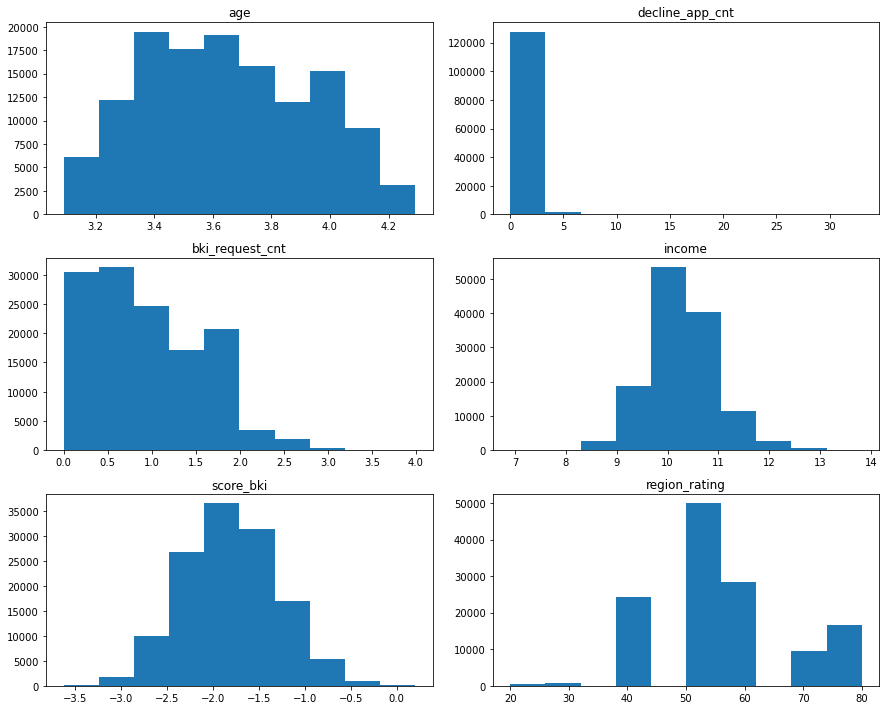

In [24]:
for column, ax in zip(num_cols, plot_grid(len(num_cols))):
    train[column].plot(kind='hist', ax=ax, title=column)
    ax.set_ylabel(None)

**BOXPLOTS ЧИСЛОВЫХ ПРИЗНАКОВ ОБУЧАЮЩЕЙ БАЗЫ**

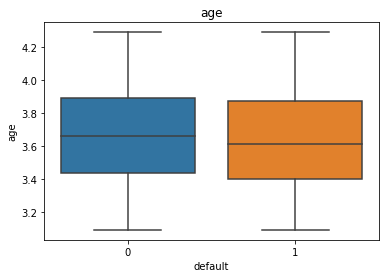

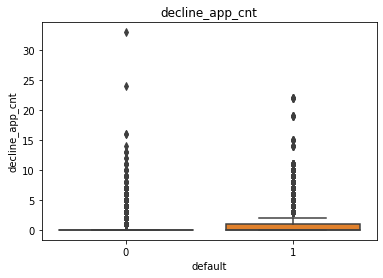

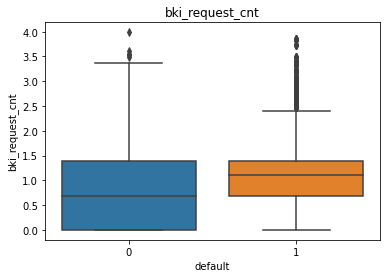

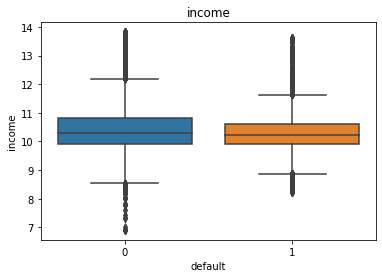

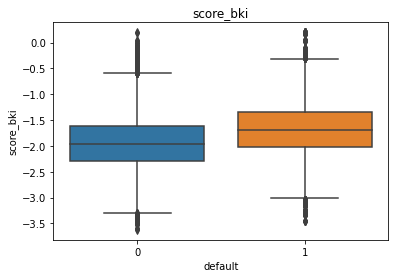

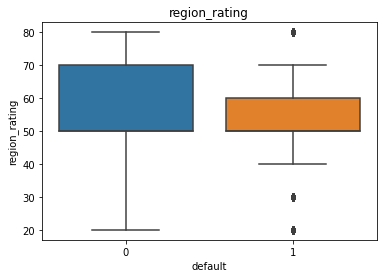

In [25]:
for column in num_cols:
    plt.figure()
    sns.boxplot(x=train['default'], y=train[column])
    plt.title(column)
    plt.show()

**ОЦЕНИМ КОРРЕЛЯЦИЮ ПИРСОНА ДЛЯ НЕПРЕРЫВНЫХ ПЕРЕМЕННЫХ В ОБУЧАЮЩЕЙ БАЗЕ**

<AxesSubplot:>

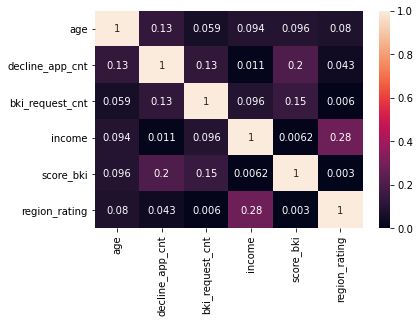

In [26]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1, annot = True)

#### НАИБОЛЬШАЯ ПОЛОЖИТЕЛЬНАЯ КОРРЕЛЯЦИЯ НАБЛЮДАЕТСЯ У ДОХОДА, ЗАТЕМ ЧУТЬ МЕНЬШЕ У КОЛИЧЕСТВА ОТКАЗОВ, ЧТО ОБЪЯСНЯЕТСЯ ПРАВИЛАМИ ВЫДАЧИ КРЕДИТОВ. НО В ЦЕЛОМ ЧИСЛЕННЫЕ ПРИЗНАКИ СКОРРЕЛИРОВАНЫ СЛАБО.

**ПРОВЕРИМ ЗНАЧИМОСТЬ ЧИСЛОВЫХ ПРИЗНАКОВ В ОБУЧАЮЩЕЙ БАЗЕ**

<AxesSubplot:>

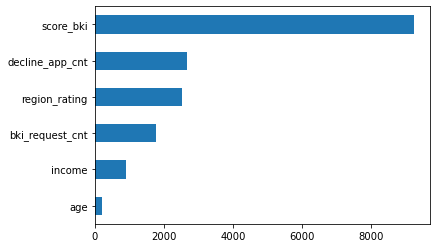

In [27]:
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

**БОЛЬШЕЕ ЗНАЧЕНИЕ ИМЕЮТ КОЛИЧЕСТВО ОТКАЗОВ, В МЕНЬШЕЙ СТЕПЕНИ ВОЗРАСТ И ДОХОД**

## БИНАРНЫЕ И КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ

**ЧТОБЫ АЛГОРИТМЫ МАШИННОГО ОБУЧЕНИЯ МОГЛИ РАБОТАТЬ С КАТЕГОРИАЛЬНЫМИ ДАННЫМИ, ИХ НУЖНО ПРЕОБРАЗОВАТЬ В ЧИСЛА**

**ДЛЯ БИНАРНЫХ ПРИЗНАКОВ ПРИМЕНИМ LabelEncoder В ОБУЧАЮЩЕЙ И ТЕСТОВОЙ БАЗАХ**

In [28]:
label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
for column in bin_cols:
    test[column] = label_encoder.fit_transform(test[column])
    

**УБЕДИМСЯ В ПРЕОБРАЗОВАНИИ**

In [29]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,1,4.143135,1,1,0,0,-2.008753,0.693147,50,1,2,9.798183,4,1,0,0
1,63161,12MAR2014,SCH,0,4.094345,0,0,0,0,-1.532276,1.386294,50,2,3,9.852247,4,1,0,0
2,25887,01FEB2014,SCH,1,3.258097,1,0,2,0,-1.408142,0.693147,80,1,2,10.308986,1,4,1,0
3,16222,23JAN2014,SCH,0,3.988984,0,0,0,0,-2.057471,1.098612,50,2,3,9.210440,1,3,0,0
4,101655,18APR2014,GRD,1,3.891820,0,0,0,1,-1.244723,0.693147,60,2,3,10.308986,1,4,1,0


In [30]:
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,1,29,1,1,0,0,-2.271884,3,50,1,2,50000,1,4,0
1,17527,24JAN2014,SCH,0,39,0,0,5,0,-1.504999,2,50,1,2,5000,4,3,0
2,75683,23MAR2014,UGR,1,50,1,1,0,0,-1.691339,1,50,1,2,30000,1,3,1
3,26883,03FEB2014,SCH,1,56,0,0,0,0,-2.374182,1,40,1,2,17000,1,3,0
4,28862,04FEB2014,GRD,0,38,0,0,0,0,-2.487502,0,80,2,3,120000,1,3,0


**ЗНАЧИМОСТЬ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ**

ДЛЯ ОЦЕНКИ ЗНАЧИМОСТИ КАТЕГОРИАЛЬНЫХ И БИНАРНЫХ ПЕРЕМЕННЫХ БУДЕМ ИСПОЛЬЗОВАТЬ ФУНКЦИЮ MUTUAL_INFO_CLASSIF ИЗ БИБЛИОТЕКИ SKLEARN. ДАННАЯ ФУНКЦИЯ ОПИРАЕТСЯ НА НЕПАРАМЕТРИЧЕСКИЕ МЕТОДЫ, ОСНОВАННЫЕ НА ОЦЕНКЕ ЭНТРОПИИ В ГРУППАХ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ.

**ЗАМЕНИМ ЗНАЧЕНИЯ ПРИЗНАКА EDUCATION В ОБУЧАЮЩЕЙ И ТЕСТОВОЙ БАЗАХ ЧИСЛАМИ: НА 1 - ШКОЛЬНОЕ И 0 - ВЫСШЕЕ**

In [31]:
education_dict = {'ACD': 0, 'PGR': 0, 'UGR': 0, 'GRD': 0, 'SCH': 1}

train.education = train['education'].map(education_dict)
print('ОБУЧАЮЩАЯ МОДЕЛЬ')
train.education.value_counts()

ОБУЧАЮЩАЯ МОДЕЛЬ


1    74489
0    55542
Name: education, dtype: int64

In [32]:
test.education = test['education'].map(education_dict)
print('ТЕСТОВАЯ МОДЕЛЬ')
test.education.value_counts()

ТЕСТОВАЯ МОДЕЛЬ


1    19309
0    17040
Name: education, dtype: int64

**УБЕДИМСЯ В ПРЕОБРАЗОВАНИИ**

In [33]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,1,1,4.143135,1,1,0,0,-2.008753,0.693147,50,1,2,9.798183,4,1,0,0
1,63161,12MAR2014,1,0,4.094345,0,0,0,0,-1.532276,1.386294,50,2,3,9.852247,4,1,0,0
2,25887,01FEB2014,1,1,3.258097,1,0,2,0,-1.408142,0.693147,80,1,2,10.308986,1,4,1,0
3,16222,23JAN2014,1,0,3.988984,0,0,0,0,-2.057471,1.098612,50,2,3,9.210440,1,3,0,0
4,101655,18APR2014,0,1,3.891820,0,0,0,1,-1.244723,0.693147,60,2,3,10.308986,1,4,1,0


In [34]:
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,0,1,29,1,1,0,0,-2.271884,3,50,1,2,50000,1,4,0
1,17527,24JAN2014,1,0,39,0,0,5,0,-1.504999,2,50,1,2,5000,4,3,0
2,75683,23MAR2014,0,1,50,1,1,0,0,-1.691339,1,50,1,2,30000,1,3,1
3,26883,03FEB2014,1,1,56,0,0,0,0,-2.374182,1,40,1,2,17000,1,3,0
4,28862,04FEB2014,0,0,38,0,0,0,0,-2.487502,0,80,2,3,120000,1,3,0


**ПОРАБОТАЕМ С ПРИЗНАКОМ app_date**

In [35]:
train.app_date.head(5)

0    01FEB2014
1    12MAR2014
2    01FEB2014
3    23JAN2014
4    18APR2014
Name: app_date, dtype: object

In [36]:
test.app_date.head(5)

0    22MAR2014
1    24JAN2014
2    23MAR2014
3    03FEB2014
4    04FEB2014
Name: app_date, dtype: object

**СКОНВЕРТИРУЕМ ДАТЫ В БОЛЕЕ УДОБНЫЙ ФОРМАТ**

In [37]:
train.app_date = pd.to_datetime(train.app_date)
test.app_date = pd.to_datetime(test.app_date)

In [38]:
train.app_date.head(5)

0   2014-02-01
1   2014-03-12
2   2014-02-01
3   2014-01-23
4   2014-04-18
Name: app_date, dtype: datetime64[ns]

In [39]:
test.app_date.head(5)

0   2014-03-22
1   2014-01-24
2   2014-03-23
3   2014-02-03
4   2014-02-04
Name: app_date, dtype: datetime64[ns]

### ДОБАВЛЕНИЕ НОВЫХ ПРИЗНАКОВ

**МЕСЯЦ ПОДАЧИ ЗАЯВЛЕНИЯ НА КРЕДИТ**

In [40]:
train['month'] = train.app_date.apply(lambda x: x.month)
test['month'] = train.app_date.apply(lambda x: x.month)

cat_cols.append('month')

**КОЛИЧЕСТВО ДНЕЙ МЕЖДУ ДАТОЙ ПОДАЧИ ЗАЯВЛЕНИЯ НА КРЕДИТ И ДАТОЙ ПОДАЧИ В БАЗЕ**

In [41]:
train['days'] = (train.app_date - train.app_date.min()).dt.days
test['days'] = (test.app_date - test.app_date.min()).dt.days

num_cols.append('days')

### ДОБАВЛЕНИЕ НОВЫХ ПРИЗНАКОВ, НА ОСНОВЕ СУЩЕСТВУЮЩИХ

In [42]:
train['bki_age_reg'] = (train['score_bki']/train['age'])*train['region_rating']
test['bki_age_reg'] = (test['score_bki']/test['age'])*test['region_rating']

In [43]:
train['mult_sna_ftime'] = train['sna'] * train['first_time']
test['mult_sna_ftime'] = test['sna'] * test['first_time']

In [44]:
train['edu_and_income'] = (train['education'] + 1) * train['income']
test['edu_and_income'] = (test['education'] + 1) * test['income']

In [45]:
train['success_client'] = (train['foreign_passport'] + 1) * (train['good_work'] + 1) * (train['car'] + 1)
test['success_client'] = (test['foreign_passport'] + 1) * (test['good_work'] + 1) * (test['car'] + 1)

In [46]:
train['very_success_client'] = train['foreign_passport'] * train['good_work'] * train['car']
test['very_success_client'] = test['foreign_passport'] * test['good_work'] * test['car']

In [47]:
train['fpassp_and_gwork'] = train['foreign_passport'] * train['good_work'] 
test['fpassp_and_gwork'] = test['foreign_passport'] * test['good_work']

In [48]:
train['fpassp_and_car'] = train['foreign_passport'] * train['car']
test['fpassp_and_car'] = test['foreign_passport'] * test['car']

In [49]:
train['gwork_and_car'] = train['good_work'] * train['car']
test['gwork_and_car'] = test['good_work'] * test['car']

In [50]:
train['home_and_work'] = train['home_address'] * train['work_address']
test['home_and_work'] = test['home_address'] * test['work_address']

In [51]:
train['sex_and_fpassp'] = train['sex'] * train['foreign_passport']
test['sex_and_fpassp'] = test['sex'] * test['foreign_passport']

In [52]:
train['age_and_bkirc'] = train['age'] * train['bki_request_cnt']
test['age_and_bkirc'] = test['age'] * test['bki_request_cnt']

**ДОБАВЛЯЕМ НОВЫЕ ПРИЗНАКИ В СООТВЕТСТВУЮЩИЕ СПИСКИ**

In [53]:
num_cols.append('bki_age_reg')
num_cols.append('mult_sna_ftime')
num_cols.append('edu_and_income')
cat_cols.append('success_client')
bin_cols.append('very_success_client')
bin_cols.append('fpassp_and_gwork')
bin_cols.append('fpassp_and_car')
bin_cols.append('gwork_and_car')

cat_cols.append('home_and_work')
bin_cols.append('sex_and_fpassp')
num_cols.append('age_and_bkirc')

**ИЗМЕНИМ ЗНАЧЕНИЯ ПРИЗНАКА decline_app_cnt, КОТОРЫЕ ВСТРЕЧАЮТСЯ НАИБОЛЕЕ РЕДКО, ЕДИНСТВЕННЫМ ЗНАЧЕНИЕМ**

In [54]:
train['decline_app_cnt'] = train['decline_app_cnt'].apply(lambda x: x if x < 4 else 4)
test['decline_app_cnt'] = test['decline_app_cnt'].apply(lambda x: x if x < 4 else 4)

**МЕНЯЕМ ПРИНАДЛЕЖНОСТЬ СПИСКУ ПРИЗНАКА decline_app_cnt**

In [55]:
num_cols.remove('decline_app_cnt')
cat_cols.append('decline_app_cnt')

**ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ БИНАРНЫХ ПРИЗНАКОВ**

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


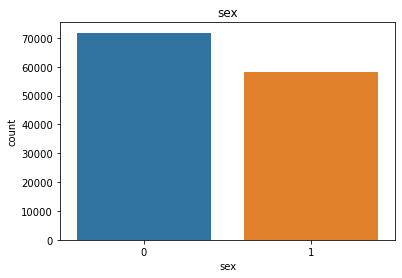

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


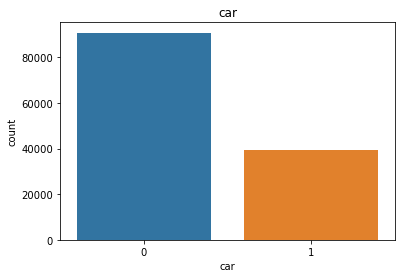

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


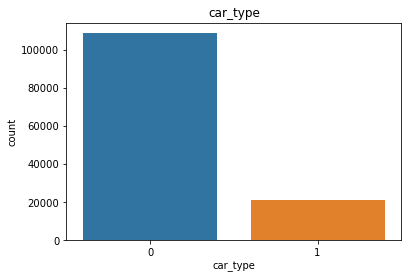

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


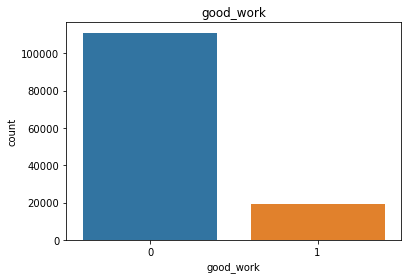

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


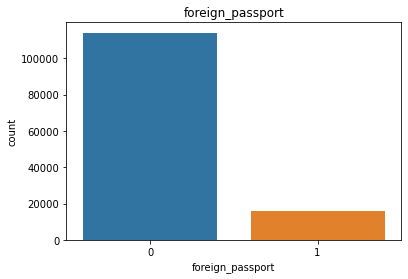

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


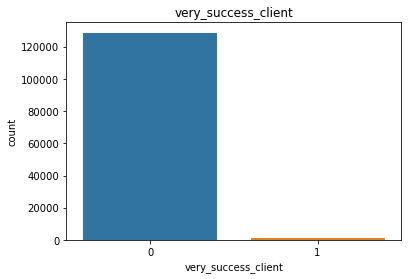

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


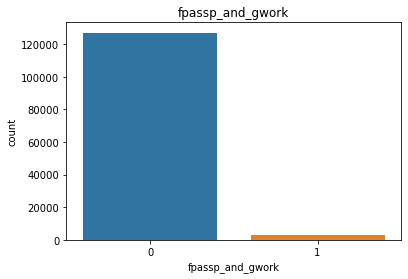

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


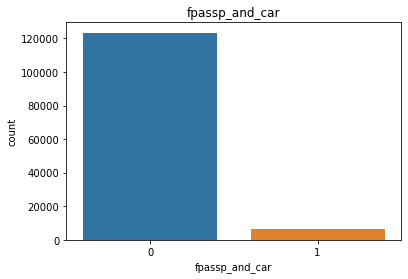

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


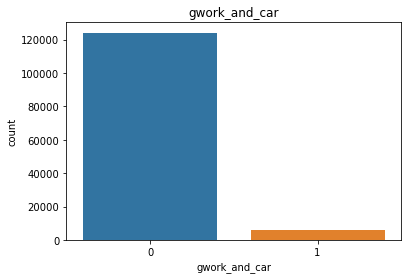

C:\Users\volodin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


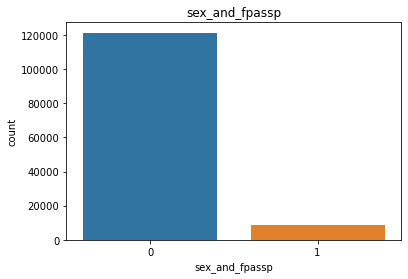

In [56]:
for column in bin_cols:
    plt.figure()
    sns.countplot(train[column])
    plt.title(column)
    plt.show()

**boxplots ЧИСЛОВЫХ ПРИЗНАКОВ**

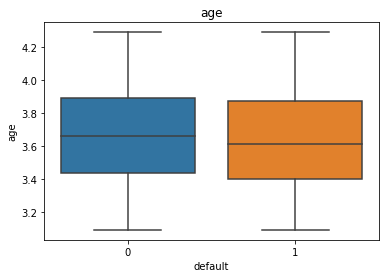

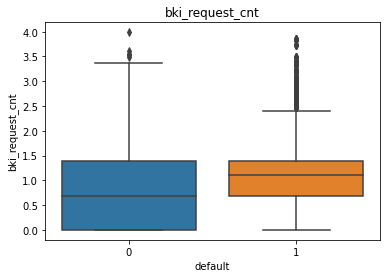

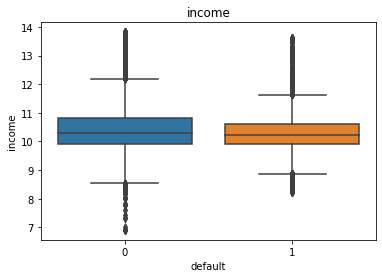

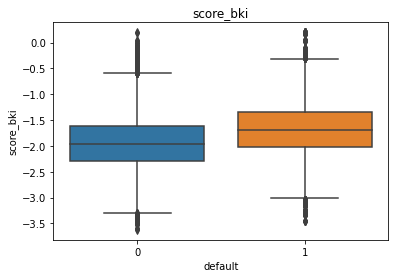

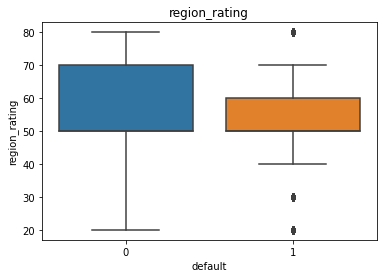

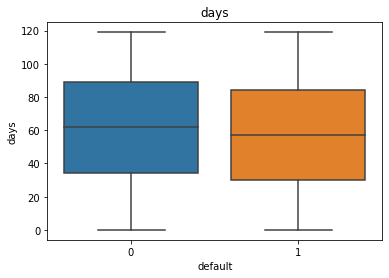

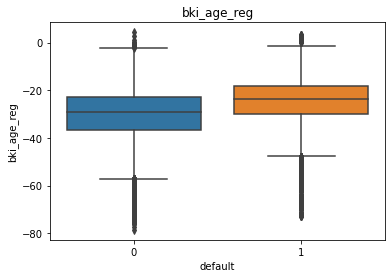

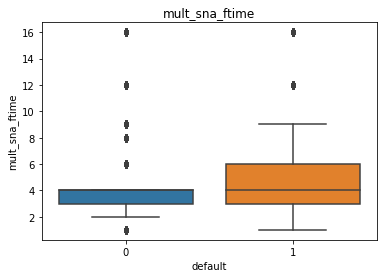

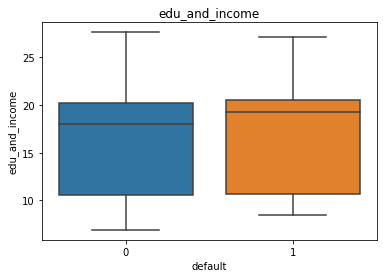

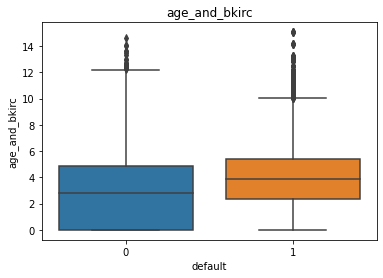

In [57]:
for column in num_cols:
    plt.figure()
    sns.boxplot(x=train['default'], y=train[column])
    plt.title(column)
    plt.show()

**ПРИСУТСТВУЮТ ВЫБРОСЫ, ПОПРОБУЕМ ИСПРАВИТЬ**

**ФУНКЦИЯ ОПРЕДЕЛЯЕТ МЕЖКВАРТИЛЬНЫЙ ИНТЕРВАЛ И ВОЗВРАЩАЕТ 1.5 МЕЖКВАРТИЛЬНЫХ РАССТОЯНИЯ С ОБЕИХ СТОРОН ОТ ЭТОГО ИНТЕРВАЛА. С ЕЁ ПОМОЩЬЮ ИЗБАВИМСЯ ОТ ВЫБРОСОВ**

In [58]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

**ПРОВЕРИМ ЗНАЧИМОСТЬ БИНАРНЫХ И КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ В ОБУЧАЮЩЕЙ БАЗЕ**

<AxesSubplot:>

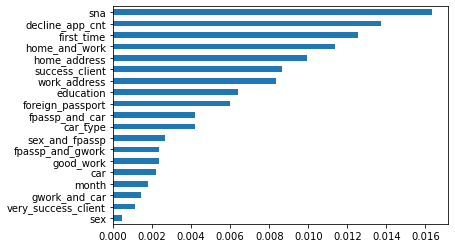

In [59]:
imp_cat = Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

**ЕЩЁ РАЗ ПОСМОТРИМ НА ЗНАЧИМОСТЬ ЧИСЛОВЫХ ПЕРЕМЕННЫХ**

Text(0.5, 0, 'F-value')

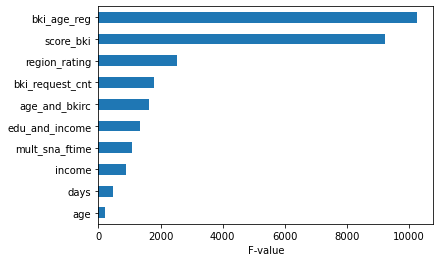

In [60]:
imp_num = Series(f_classif(train[num_cols], train['default'])[0],
                 index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')
plt.xlabel('F-value')

**КОРРЕЛЯЦИЯ ПРИЗНАКОВ ОБУЧАЮЩЕЙ БАЗЫ**

In [61]:
corr_train = train.drop(['client_id', 'education'],axis = 1).corr()
corr_train.style.background_gradient(cmap='coolwarm').set_precision(3)

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,month,days,bki_age_reg,mult_sna_ftime,edu_and_income,success_client,very_success_client,fpassp_and_gwork,fpassp_and_car,gwork_and_car,home_and_work,sex_and_fpassp,age_and_bkirc
sex,1.000,-0.123,0.265,0.205,0.019,-0.044,-0.062,-0.054,0.107,0.042,0.066,0.297,0.014,0.002,0.073,0.029,-0.032,-0.035,-0.132,0.018,0.024,0.160,0.042,0.023,0.108,0.057,0.051,0.298,-0.068
age,-0.123,1.000,-0.036,-0.031,-0.141,-0.060,-0.096,0.059,-0.080,0.006,-0.007,-0.094,-0.063,0.097,-0.031,-0.039,0.018,0.020,0.180,-0.019,0.132,-0.060,-0.019,-0.038,-0.007,-0.040,0.003,-0.034,0.163
car,0.265,-0.036,1.000,0.674,-0.040,0.008,-0.051,-0.052,0.052,-0.035,-0.022,0.313,-0.068,0.088,0.096,-0.066,-0.013,-0.016,-0.076,-0.000,-0.059,0.611,0.157,0.051,0.355,0.332,-0.035,0.129,-0.055
car_type,0.205,-0.031,0.674,1.000,-0.053,0.021,-0.044,-0.012,0.087,-0.027,-0.016,0.353,-0.080,0.102,0.131,-0.091,-0.018,-0.020,-0.093,-0.002,-0.084,0.474,0.166,0.076,0.338,0.250,-0.027,0.154,-0.016
decline_app_cnt,0.019,-0.141,-0.040,-0.053,1.000,-0.030,0.221,0.140,-0.045,0.028,0.032,-0.014,0.066,-0.077,-0.038,0.155,-0.024,-0.025,0.166,0.019,0.008,-0.058,-0.027,-0.030,-0.040,-0.027,0.031,-0.024,0.123
good_work,-0.044,-0.060,0.008,0.021,-0.030,1.000,0.007,0.012,0.063,-0.020,-0.025,0.039,-0.060,0.056,0.044,-0.068,0.011,0.010,-0.049,-0.020,-0.149,0.525,0.249,0.372,0.038,0.527,-0.022,0.026,0.006
score_bki,-0.062,-0.096,-0.051,-0.044,0.221,0.007,1.000,0.152,0.003,0.027,0.026,-0.006,0.066,-0.071,-0.030,0.258,-0.062,-0.062,0.732,0.037,-0.006,-0.043,-0.018,-0.014,-0.038,-0.019,0.029,-0.035,0.143
bki_request_cnt,-0.054,0.059,-0.052,-0.012,0.140,0.012,0.152,1.000,-0.006,0.019,0.015,0.096,0.009,0.013,0.002,0.116,-0.011,-0.010,0.125,0.026,0.007,-0.023,-0.010,-0.004,-0.016,-0.008,0.019,-0.010,0.992
region_rating,0.107,-0.080,0.052,0.087,-0.045,0.063,0.003,-0.006,1.000,0.182,0.202,0.284,-0.066,0.075,0.237,-0.138,0.012,0.016,-0.620,-0.020,-0.054,0.185,0.093,0.136,0.158,0.058,0.198,0.192,-0.015
home_address,0.042,0.006,-0.035,-0.027,0.028,-0.020,0.027,0.019,0.182,1.000,0.748,0.026,0.150,-0.079,0.017,0.130,0.130,0.126,-0.091,0.088,0.016,-0.015,0.006,0.015,0.007,-0.015,0.968,0.020,0.019


**УДАЛИМ ПРИЗНАКИ С ВЫСОКОЙ КОРРЕЛЯЦИЕЙ (ПО МОДУЛЮ > 0.8)**

In [62]:
cat_cols.remove('month')

## ПОДГОТОВКА ДАННЫХ К МАШИННОМУ ОБУЧЕНИЮ

1. Сначала необходимо провести разделение на трейн и тест, а затем применять стандартизирование и все остальное. Перед обучением регрессии нам следует стандартизировать числовые признаки, а также воспользоваться dummy-кодированием для категориальных переменных, то есть создать отдельную бинарную переменную для каждой категории.
2. Как вы уже поняли, LabelEncoder не совсем подходит для признаков с двумя и большим количеством категорий. Для того, чтобы мы смогли применять линейные модели на таких данных, нам необходим другой метод, который называется One-Hot Encoding. Смысл его точно такой же, как у dummy-кодирования.
3. Предположим, что некоторый признак может принимать пять разных значений. В этом случае One Hot Encoding подразумевает создание пяти новых признаков, все из которых равны нулю, за исключением одного. На позицию, соответствующую численному значению признака, мы помещаем .
4. Эта техника реализована в sklearn.preprocessing в классе OneHotEncoder. По умолчанию OneHotEncoder преобразует данные в разреженную матрицу, чтобы не расходовать память на хранение многочисленных нулей.

In [63]:
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
X_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [64]:
Y_cat = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)
Y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

**СТАНДАРТИЗАЦИЯ ЧИСЛОВЫХ ПЕРЕМЕННЫХ**

In [65]:
X_num = StandardScaler().fit_transform(train[num_cols].values)
X_num

array([[ 1.73772057, -0.36512832, -0.74164399, ..., -0.14062024,
         0.70828325, -0.22421206],
       [ 1.56687038,  0.67457309, -0.66225864, ..., -0.14062024,
         0.73023514,  0.90850507],
       [-1.36144801, -0.36512832,  0.00839451, ..., -0.14062024,
         0.9156863 , -0.47201442],
       ...,
       [ 0.40028705,  0.67457309,  0.75844606, ...,  4.26531311,
         1.12309295,  0.72195045],
       [ 1.06576925,  1.00928218, -1.00933965, ..., -0.50778135,
        -1.31792159,  1.18452389],
       [-0.86034688,  0.67457309, -1.2194468 , ...,  0.59370198,
         0.57615969,  0.5203557 ]])

In [66]:
Y_num = StandardScaler().fit_transform(test[num_cols].values)
Y_num

array([[-0.88473151,  0.42909592,  0.20922178, ..., -0.07356829,
        -0.13382952,  0.06826015],
       [-0.01615572, -0.00630055, -0.81813846, ...,  3.20908805,
        -0.80203706, -0.02234634],
       [ 0.93927766, -0.44169701, -0.24738277, ..., -0.48390034,
        -0.46793329, -0.30423318],
       ...,
       [-0.71101635, -0.44169701,  0.43752406, ...,  1.56775988,
         0.03322236, -0.49551353],
       [-1.05844667, -0.00630055, -0.24738277, ..., -1.30456442,
        -0.46793329, -0.26396363],
       [-0.10301329, -0.00630055, -0.58983618, ...,  1.56775988,
        -0.46793329, -0.04248111]])

**ОБЪЕДИНЯЕМ ПЕРЕМЕННЫЕ**

#### ОБЪЕДИНИМ СТАНДАРТИЗОВАННЫЕ ЧИСЛОВЫЕ, БИНАРНЫЕ И ЗАКОДИРОВАННЫЕ КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ В ОДНО ПРИЗНАКОВОЕ ПРОСТРАНСТВО, РАЗДЕЛИВ ПРИ ЭТОМ ПРИЗНАКИ И ЦЕЛЕВУЮ ПЕРЕМЕННУЮ.

In [67]:
X = np.hstack([X_num, train[bin_cols].values, X_cat])
Y = train['default'].values

id_test = test['client_id']
test = np.hstack([Y_num, test[bin_cols].values, Y_cat])

**РАЗДЕЛЯЕМ ОБУЧАЮЩУЮ ВЫБОРКУ НА ТРЕНИРОВОЧНУЮ И ВАЛИДАЦИОННУЮ**

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = True)

### ПОДБОР ЛУЧШИХ ГИПЕРПАРАМЕТРОВ ДЛЯ МОДЕЛИ

In [69]:
from sklearn.model_selection import GridSearchCV

**ДОБАВИМ ТИП РЕГУЛЯРИЗАЦИИ**

In [70]:
penalty = ['l1', 'l2']

**ЗАДАДИМ ОГРАНИЧЕНИЯ ДЛЯ ПАРАМЕТРА РЕГУЛЯРИЗАЦИИ**

In [71]:
C = np.logspace(0, 4, 10)

**СОЗДАДИМ ГИПЕРПАРАМЕТРЫ**

In [72]:
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression(max_iter=190)
model.fit(X_train, y_train)

LogisticRegression(max_iter=190)

**СОЗДАДИМ СЕТКУ ПОИСКА С ИСПОЛЬЗОВАНИЕМ 5-КРАТНОЙ ПЕРЕКРЕСТНОЙ ПРОВЕРКИ**

In [73]:
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_p = best_model.best_estimator_.get_params()['penalty']
best_C = best_model.best_estimator_.get_params()['C']


print('Лучшее Penalty:', best_p)
print('Лучшее C:', best_C)

C:\Users\volodin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\volodin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\volodin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\volodin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\volodin\Anaconda3\lib\site-packages\sklearn\model_se

Лучшее Penalty: l2
Лучшее C: 464.15888336127773


**ОПИСЫВАЕМ И ОБУЧАЕМ МОДЕЛЬ**

In [75]:
model = LogisticRegression( 
                           C=best_C, 
                           class_weight='balanced', 
                           dual=False, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           multi_class='auto', 
                           n_jobs=None, 
                           penalty='l2', 
                           solver='liblinear', 
                           verbose=0, 
                           max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(C=464.15888336127773, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

**ПРЕДСКАЗЫВАЕМ ЗНАЧЕНИЯ ВАЛИДАЦИОННОЙ БАЗЫ**

In [76]:
Y_predict = model.predict(X_valid)
Y_predict_prob = model.predict_proba(X_valid)[:,1]

In [77]:
Y_predict_prob

array([0.83703872, 0.22733058, 0.68994322, ..., 0.51158698, 0.42891952,
       0.76976184])

**ПРЕДСКАЗЫВАЕМ ЗНАЧЕНИЯ ТЕСТОВОЙ БАЗЫ**

In [78]:
# Предсказываем значения тестовой базы
y_pred_test = model.predict(test)
y_pred_prob_test = model.predict_proba(test)[:,1]

In [79]:
y_pred_prob_test

array([0.25424814, 0.81158898, 0.29464233, ..., 0.84965034, 0.71019469,
       0.71832711])

**ФУНКЦИЯ ДЛЯ ВЫВОДА МЕТРИК ДЛЯ ОЦЕНКИ КАЧЕСТВА МОДЕЛИ**

In [80]:
def all_metrics(y_true, y_pred, y_pred_prob):
    dict_metric = {}
    P = np.sum(y_true==1)
    N = np.sum(y_true==0)
    TP = np.sum((y_true==1)&(y_pred==1))
    TN = np.sum((y_true==0)&(y_pred==0))
    FP = np.sum((y_true==0)&(y_pred==1))
    FN = np.sum((y_true==1)&(y_pred==0))
    
    dict_metric['Positive, P'] = [P,'default']
    dict_metric['Negative, N'] = [N,'non-default']
    dict_metric['True Positive, TP'] = [TP,'correctly identified default']
    dict_metric['True Negative, TN'] = [TN,'correctly identified non-default']
    dict_metric['False Positive, FP'] = [FP,'incorrectly identified default']
    dict_metric['False Negative, FN'] = [FN,'incorrectly identified non-default']
    dict_metric['Accuracy'] = [accuracy_score(y_true, y_pred),'Accuracy=(TP+TN)/(P+N)']
    dict_metric['Precision'] = [precision_score(y_true, y_pred),'Precision = TP/(TP+FP)'] 
    dict_metric['Recall'] = [recall_score(y_true, y_pred),'Recall = TP/P']
    dict_metric['F1-score'] = [f1_score(y_true, y_pred),'Harmonical mean of Precision и Recall']
    dict_metric['ROC_AUC'] = [roc_auc_score(y_true, y_pred_prob),'ROC AUC Score']    

    temp_df = pd.DataFrame.from_dict(dict_metric, orient='index', columns=['Value', 'Description'])
    display(temp_df)

**ПОСТРОИМ ROC-КРИВУЮ**

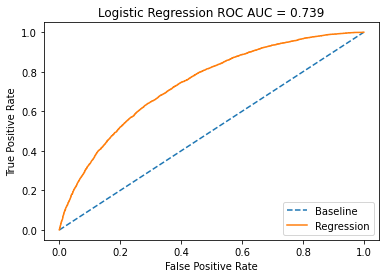

In [81]:
fpr, tpr, threshold = roc_curve(y_valid, Y_predict_prob)
roc_auc = roc_auc_score(y_valid, Y_predict_prob)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

**ФУНКЦИЯ ДЛЯ ВИЗУАЛИЗАЦИИ CONFUSION MATRIX**

In [82]:
def show_confusion_matrix(y_true, y_pred):
    color_text = plt.get_cmap('PuBu')(0.95)
    class_names = ['Default', 'Non-Default']
    cm = confusion_matrix(y_true, y_pred)
    cm[0,0], cm[1,1] = cm[1,1], cm[0,0]
    df = pd.DataFrame(cm, index=class_names, columns=class_names)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), title="Confusion Matrix")
    ax.title.set_fontsize(15)
    sns.heatmap(df, square=True, annot=True, fmt="d", linewidths=1, cmap="PuBu")
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor", fontsize=12)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor", fontsize=12)
    ax.set_ylabel('Predicted Values', fontsize=14, color = color_text)
    ax.set_xlabel('Real Values', fontsize=14, color = color_text)
    b, t = plt.ylim()
    plt.ylim(b+0.5, t-0.5)
    fig.tight_layout()
    plt.show()

**ВЫВЕДЕМ CONFUSION MATRIX**

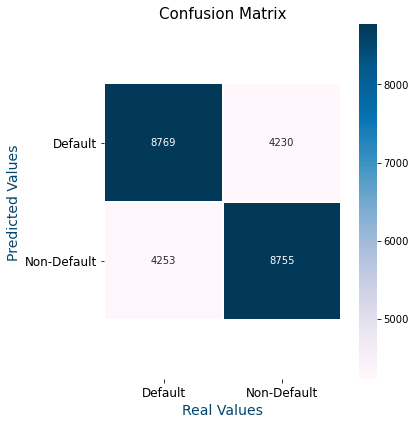

In [83]:
show_confusion_matrix(y_valid, Y_predict)

**МЕТРИКИ КАЧЕСТВА МОДЕЛИ**

In [84]:
all_metrics(y_valid, Y_predict, Y_predict_prob)

,Value,Description
"Positive, P",13022.000000,default
"Negative, N",12985.000000,non-default
"True Positive, TP",8769.000000,correctly identified default
"True Negative, TN",8755.000000,correctly identified non-default
"False Positive, FP",4230.000000,incorrectly identified default
"False Negative, FN",4253.000000,incorrectly identified non-default
Accuracy,0.673819,Accuracy=(TP+TN)/(P+N)
Precision,0.674590,Precision = TP/(TP+FP)
Recall,0.673399,Recall = TP/P
F1-score,0.673994,Harmonical mean of Precision и Recall


**ОБУЧАЕМ МОДЕЛЬ НА ВСЕЙ ОБУЧАЮЩЕЙ БАЗЕ**

In [ ]:
main_model = LogisticRegression( 
                           C=2.7825594022071245, 
                           class_weight='balanced', 
                           dual=False, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           multi_class='auto', 
                           n_jobs=None, 
                           penalty='l2', 
                           solver='liblinear', 
                           verbose=0, 
                           max_iter=1000)
main_model.fit(X, Y)

**ПРЕДСКАЗЫВАЕМ ЗНАЧЕНИЯ ДЛЯ ТЕСТОВОЙ БАЗЫ**

In [85]:
y_pred_test = main_model.predict(test)
y_pred_prob_test = main_model.predict_proba(test)[:,1]

NameError: name 'main_model' is not defined

**ЗАПИСЫВАЕМ ПРЕДСКАЗАННЫЕ МОДЕЛЬЮ ВЕРОЯТНОСТИ ДЕФОЛТА ЗАЁМЩИКОВ ИЗ ТЕСТОВОЙ БАЗЫ В ОТДЕЛЬНЫЙ ФАЙЛ**

In [ ]:
new_sample_submission = pd.DataFrame({'client_id': id_test,
                              'default': y_pred_prob_test})
new_sample_submission.to_csv('submission.csv', index=False)

new_sample_submission.head(10)